# Part3 BlobDetector
Author: Victor Badenas Crespo

## Purpose
Case study of the different effects of different blob detectors.

## Methodology
Modifying the example in [the scikit-image corner detection example](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_corner.html#sphx-glr-auto-examples-features-detection-plot-corner-py), the blob detection used in the example are evaluated using images from [the example image collection of scikit-image package]

***
## Setup

### Library import
We import all the required Python libraries

In [1]:
import skimage
import numpy as np
import ipywidgets as widgets
import pandas as pd

import matplotlib.pyplot as plt
from skimage import data, color, io, transform
from skimage.feature import (match_descriptors, corner_peaks, corner_harris, corner_subpix,
                             plot_matches, BRIEF, ORB)
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse
from skimage.color import rgb2gray
from skimage.util import img_as_float
from skimage.exposure import rescale_intensity
from skimage.measure import ransac

from matplotlib import pyplot as plt
from pprint import pprint
from math import sqrt
from ipywidgets import interact, interactive, fixed, interact_manual

### Local library import and functions
We import all the required local libraries and user defined functions and utilities

In [2]:
def plotImages(images, grid=(2, 2), figsize=(15, 9), **kwargs):
    f, ax = plt.subplots(grid[0], grid[1], figsize=figsize)
    for imageIdx, (title, image) in enumerate(images.items()):
        cmap = plt.cm.gray if image.ndim == 2 else None
        if grid[0] == 1:
            ax[imageIdx].set_title(title)
            ax[imageIdx].imshow(image, cmap=cmap, **kwargs)
            ax[imageIdx].axis('off')
        else:
            ax[imageIdx//grid[1]][imageIdx%grid[1]].set_title(title)
            ax[imageIdx//grid[1]][imageIdx%grid[1]].imshow(image, cmap=cmap, **kwargs)
            ax[imageIdx//grid[1]][imageIdx%grid[1]].axis('off')
    return f, ax

***
## Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

In [3]:
# skimage data image list
images = {
    'astronaut': None,
    'binary_blobs': None,
    'brick': None,
    'colorwheel': None,
    'camera': None,
    'cat': None,
    'checkerboard': None,
    'clock': None,
    'coffee': None,
    'coins': None,
    'eagle': None,
    'grass': None,
    'gravel': None,
    'horse': None,
    'hubble_deep_field': None,
    'page': None,
    'text': None,
    'rocket': None
}


In [4]:
matrix = np.array([[1, -0.5, 100],
                   [0.1, 0.9, 50],
                   [0.0015, 0.0015, 1]])
transforms = {
    "None": None,
    "Euclidean": transform.EuclideanTransform(rotation=np.pi / 12., translation = (100, -20)),
    "Euclidean90": transform.EuclideanTransform(rotation=np.pi / 2., translation = (500, 0)),
    "Similarity": transform.SimilarityTransform(scale=1.5, rotation=np.pi/24, translation=(20, 50)),
    "Shear": transform.AffineTransform(shear=np.pi/6),
    "Projective": transform.ProjectiveTransform(matrix=matrix),
}
distortions = {
    "None": None,
    "Gaussian": skimage.filters.gaussian,
    "Noise": skimage.util.random_noise,
}
methods = {
    "BRIEF": BRIEF(), 
    "ORB": ORB(n_keypoints=200),
}

***
## Data import
We retrieve all the required data for the analysis.

In [5]:
# load all data images
for imageName in images:
    images[imageName] = getattr(data, imageName)()

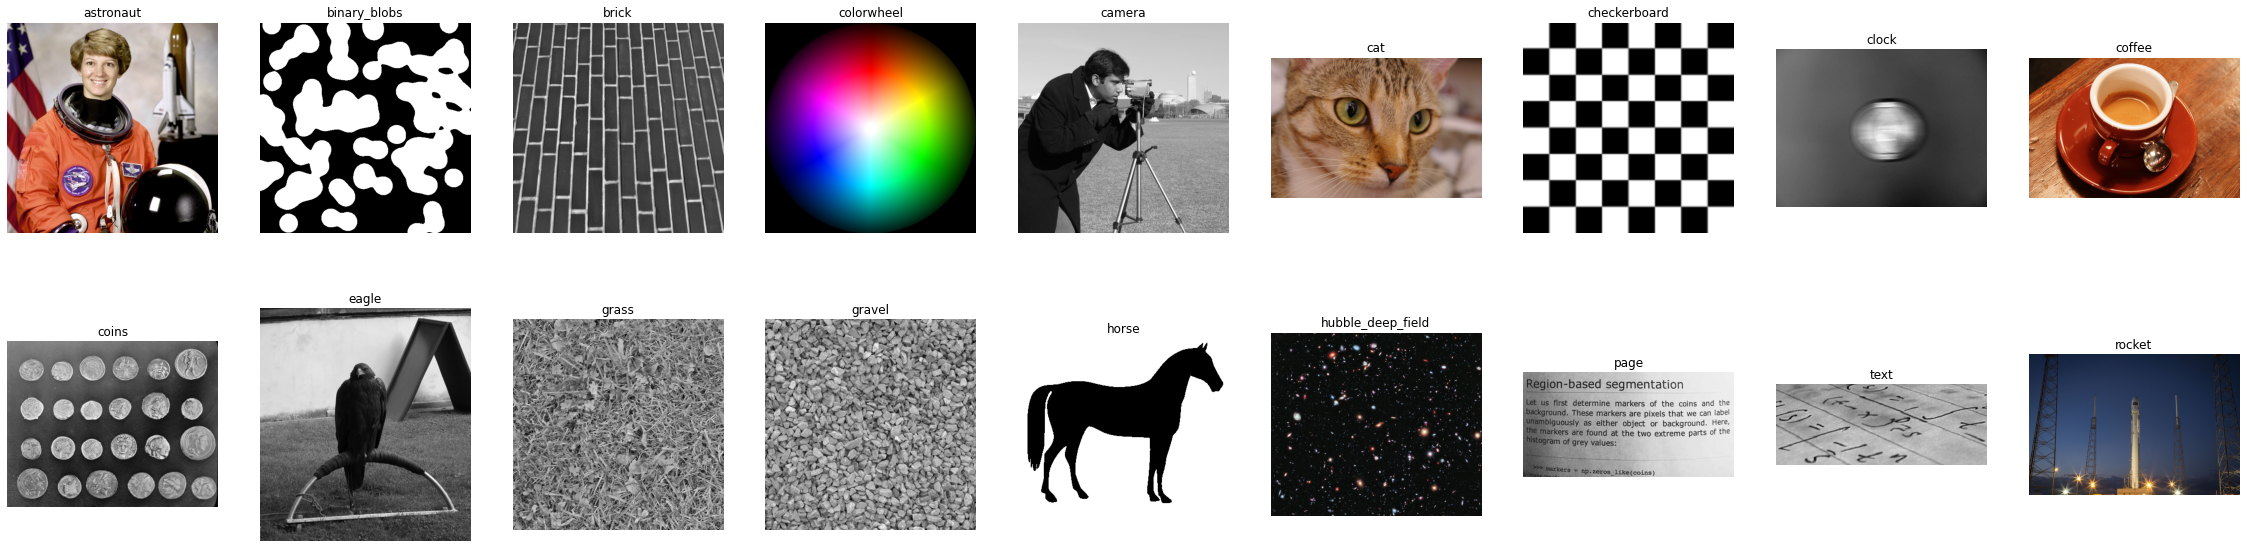

In [6]:
# plot all data images loaded in the previous cell
plotImages(images, grid=(2, int(len(images)/2)), figsize=(40, 10))
plt.show()

***
## Data processing

In [7]:
@interact(imageName=list(images.keys()), methodName=list(methods.keys()), transformName=list(transforms.keys()), distortionName=list(distortions.keys()))
def compareImages(imageName='astronaut', methodName="BRIEF", transformName="None", distortionName="None"):
    img1 = rgb2gray(images[imageName])
    tform = transforms[transformName]
    distortion = distortions[distortionName]
    img2 = transform.warp(img1, tform) if tform else img1
    
    if distortionName != "None":
        img2 = distortion(img2)

    keypoints1 = corner_peaks(corner_harris(img1), min_distance=5, threshold_rel=0.1)
    keypoints2 = corner_peaks(corner_harris(img2), min_distance=5, threshold_rel=0.1)

    extractor = methods[methodName]
    if methodName == "ORB":
        extractor.detect_and_extract(img1)
        keypoints1, descriptors1 = extractor.keypoints, extractor.descriptors
        extractor.detect_and_extract(img2)
        keypoints2, descriptors2 = extractor.keypoints, extractor.descriptors
    elif methodName == "BRIEF":
        extractor.extract(img1, keypoints1)
        keypoints1, descriptors1 = keypoints1[extractor.mask], extractor.descriptors
        extractor.extract(img2, keypoints2)
        keypoints2, descriptors2 = keypoints2[extractor.mask], extractor.descriptors
    else:
        return
    
    if len(descriptors1) and len(descriptors2):
        matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
    else:
        print("no descriptors found")
        matches12 = np.array([])
    
    print(f"Number of matches: {len(matches12)}")

    fig, ax = plt.subplots(nrows=1, ncols=1)
    plt.gray()
    plot_matches(ax, img1, img2, keypoints1, keypoints2, matches12)
    ax.axis('off')
    ax.set_title("Original Image vs. Transformed Image")
    plt.show()

interactive(children=(Dropdown(description='imageName', options=('astronaut', 'binary_blobs', 'brick', 'colorw…

***

## Discussion


***
# END
***
***